<a href="https://colab.research.google.com/github/chavezgranados/Machine-Learning/blob/main/s2/sesion2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font face="gotham" color="purple"> **MACHINE LEARNING IN ECONOMICS 2025: SESIÓN 2**</font>


`Luis Chávez`

![texto del vínculo](https://dais.chbe.ubc.ca/assets/thumbnails/neural.png)

# <font face="gotham" color="purple"> **1. Regresión lineal múltiple**</font>

## <font face="gotham" color="purple"> **1.1 Preámbulo**</font>

Se carga las siguientes librerías:

In [57]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

## <font face="gotham" color="purple"> **1.2 Carga de datos**</font>

### **a) Cargando datos de INEI (sin descarga)**

In [58]:
# Ejemplo de ENAHO
# ==============================================================================
"""
import zipfile
!wget -nc https://proyectos.inei.gob.pe/iinei/srienaho/descarga/STATA/906-Modulo34.zip

with zipfile.ZipFile('906-Modulo34.zip', 'r') as zip_ref:
     zip_ref.extractall('906-Modulo34')

df = pd.read_stata('906-Modulo34/906-Modulo34/sumaria-2023.dta')
print(df.head())
"""

"\nimport zipfile\n!wget -nc https://proyectos.inei.gob.pe/iinei/srienaho/descarga/STATA/906-Modulo34.zip\n\nwith zipfile.ZipFile('906-Modulo34.zip', 'r') as zip_ref:\n     zip_ref.extractall('906-Modulo34')\n\ndf = pd.read_stata('906-Modulo34/906-Modulo34/sumaria-2023.dta')\nprint(df.head())\n"

### **b) Cargando datos de INEI (con descarga)**

In [59]:
base1=pd.read_stata('enaho01-2023-100.dta')
base1.head(2)

,aÑo,mes,conglome,vivienda,hogar,ubigeo,dominio,estrato,periodo,tipenc,...,nbi4,nbi5,factor07,nconglome,sub_conglome,codccpp,nomccpp,longitud,latitud,altitud
0,2023,02,005007,003,11,010101,sierra norte,de 20 000 a 49 999 habitantes,1,seleccion por muestra panel,...,NaN,NaN,50.466671,07070,00,0001,CIUDAD CHACHAPOYAS,-77.873924,-6.229049,2338.0
1,2023,02,005007,012,11,010101,sierra norte,de 20 000 a 49 999 habitantes,1,seleccion por muestra panel,...,NaN,NaN,50.466671,07070,00,0001,CIUDAD CHACHAPOYAS,-77.873924,-6.229049,2338.0


In [60]:
base2=pd.read_stata('enaho01-2023-200.dta')
base2.head(2)

,aÑo,mes,conglome,vivienda,hogar,codperso,ubigeo,dominio,estrato,p201p,...,ocupac_r3,ocupac_r4,rama_r3,rama_r4,codtarea,codtiempo,ticuest01,facpob07,nconglome,sub_conglome
0,2023,02,005007,022,11,01,010101,sierra norte,de 20 000 a 49 999 habitantes,20190050070221101,...,NaN,NaN,NaN,NaN,,,cuestionario en tablet,50.466671,07070,00
1,2023,02,005007,022,11,02,010101,sierra norte,de 20 000 a 49 999 habitantes,20190050070221102,...,NaN,NaN,NaN,NaN,,,cuestionario en tablet,50.466671,07070,00


In [61]:
datos1 = base1[['conglome','vivienda','hogar','ubigeo','fecent','p101','p104','p106','p106a','p110','p1141','p1142','p1143','p1144','result']]
datos1 = datos1[datos1['result'] == 'completa']
datos1.head(5)

,conglome,vivienda,hogar,ubigeo,fecent,p101,p104,p106,p106a,p110,p1141,p1142,p1143,p1144,result
2,005007,022,11,010101,20230228,casa independiente,6.0,1000.0,si,"red publica, dentro de la vivienda",pase,telefono celular,conexion a tv por cable o satelital,conexion a internet,completa
3,005007,031,11,010101,20230214,casa independiente,11.0,2000.0,si,"red publica, dentro de la vivienda",pase,telefono celular,conexion a tv por cable o satelital,conexion a internet,completa
8,005027,006,11,010201,20230819,"vivienda en casa de vecindad (callejon, solar ...",2.0,150.0,NaN,"red publica, fuera de la vivienda pero dentro ...",pase,telefono celular,pase,conexion a internet,completa
9,005027,018,11,010201,20230821,casa independiente,3.0,NaN,NaN,"red publica, dentro de la vivienda",pase,telefono celular,pase,conexion a internet,completa
10,005027,044,11,010201,20230904,casa independiente,4.0,465.0,no,"red publica, dentro de la vivienda",pase,telefono celular,conexion a tv por cable o satelital,conexion a internet,completa


In [62]:
datos2 = base2[['conglome','vivienda','hogar','ubigeo','codperso','p203','p207','p208a','p209']]
datos2.head(5)

,conglome,vivienda,hogar,ubigeo,codperso,p203,p207,p208a,p209
0,005007,022,11,010101,01,jefe/jefa,hombre,64.0,casado(a)
1,005007,022,11,010101,02,esposo(a)/compañero(a),mujer,63.0,casado(a)
2,005007,022,11,010101,03,hijo(a)/hijastro(a),hombre,31.0,soltero(a)
3,005007,031,11,010101,01,jefe/jefa,mujer,79.0,viudo(a)
4,005007,031,11,010101,02,hijo(a)/hijastro(a),hombre,50.0,conviviente


In [63]:
datos1 = datos1.assign(id1 = datos1['conglome'].astype(str) + datos1['vivienda'].astype(str) + datos1['hogar'].astype(str))

In [64]:
datos1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28778 entries, 2 to 44376
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   conglome  28778 non-null  object  
 1   vivienda  28778 non-null  object  
 2   hogar     28778 non-null  object  
 3   ubigeo    28778 non-null  object  
 4   fecent    28778 non-null  int32   
 5   p101      28483 non-null  category
 6   p104      28483 non-null  float64 
 7   p106      25954 non-null  float64 
 8   p106a     21889 non-null  category
 9   p110      28778 non-null  category
 10  p1141     28778 non-null  category
 11  p1142     28778 non-null  category
 12  p1143     28778 non-null  category
 13  p1144     28778 non-null  category
 14  result    28778 non-null  category
 15  id1       28778 non-null  object  
dtypes: category(8), float64(2), int32(1), object(5)
memory usage: 2.1+ MB


In [65]:
datos2 = datos2.assign(id2 = datos2['conglome'].astype(str) + datos2['vivienda'].astype(str) + datos2['hogar'].astype(str))

In [66]:
datos2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119747 entries, 0 to 119746
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   conglome  119747 non-null  object  
 1   vivienda  119747 non-null  object  
 2   hogar     119747 non-null  object  
 3   ubigeo    119747 non-null  object  
 4   codperso  119747 non-null  object  
 5   p203      119747 non-null  category
 6   p207      116260 non-null  category
 7   p208a     116260 non-null  float64 
 8   p209      94229 non-null   category
 9   id2       119747 non-null  object  
dtypes: category(3), float64(1), object(6)
memory usage: 6.7+ MB


In [67]:
# Merge
# ==============================================================================
bfinal = pd.merge(datos1, datos2, left_on='id1', right_on='id2', how='inner', indicator=True) # empata hogares y personas
bfinal.head(2)

,conglome_x,vivienda_x,hogar_x,ubigeo_x,fecent,p101,p104,p106,p106a,p110,...,vivienda_y,hogar_y,ubigeo_y,codperso,p203,p207,p208a,p209,id2,_merge
0,005007,022,11,010101,20230228,casa independiente,6.0,1000.0,si,"red publica, dentro de la vivienda",...,022,11,010101,01,jefe/jefa,hombre,64.0,casado(a),00500702211,both
1,005007,022,11,010101,20230228,casa independiente,6.0,1000.0,si,"red publica, dentro de la vivienda",...,022,11,010101,02,esposo(a)/compañero(a),mujer,63.0,casado(a),00500702211,both


In [68]:
# Tabulación básica
# ==============================================================================
tabla1 = bfinal['p203'].value_counts()
tabla1
frecuencia = pd.DataFrame({'Parentesco': tabla1.index, 'fi': tabla1.values})
frecuencia

,Parentesco,fi
0,hijo(a)/hijastro(a),39343
1,jefe/jefa,28778
2,esposo(a)/compañero(a),16827
3,nieto(a),5718
4,panel,3008
5,padres/suegros,1640
6,otros parientes,1599
7,yerno/nuera,1364
8,hermano(a),1226
9,otros no parientes,979


In [69]:
frecuencia['Fi'] = frecuencia['fi'].cumsum()
frecuencia['hi'] = (frecuencia['fi'] / frecuencia['fi'].sum())*100
frecuencia['Hi'] = frecuencia['hi'].cumsum()
frecuencia

,Parentesco,fi,Fi,hi,Hi
0,hijo(a)/hijastro(a),39343,39343,39.147653,39.147653
1,jefe/jefa,28778,68121,28.635111,67.782764
2,esposo(a)/compañero(a),16827,84948,16.743450,84.526214
3,nieto(a),5718,90666,5.689609,90.215823
4,panel,3008,93674,2.993065,93.208888
5,padres/suegros,1640,95314,1.631857,94.840745
6,otros parientes,1599,96913,1.591061,96.431805
7,yerno/nuera,1364,98277,1.357227,97.789033
8,hermano(a),1226,99503,1.219913,99.008945
9,otros no parientes,979,100482,0.974139,99.983084


Ojo con la categoría **panel**.

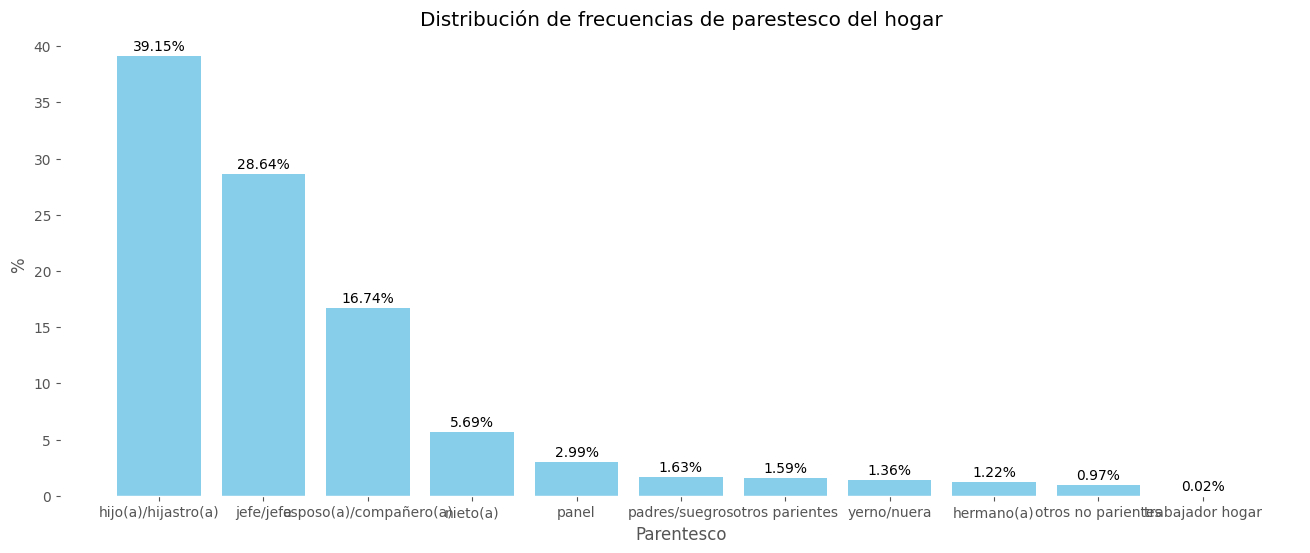

In [70]:
# Diagrama de barras básico
# ==============================================================================
plt.figure(figsize=(16, 6))
plt.bar(frecuencia['Parentesco'], frecuencia['hi'], color='skyblue')
plt.xlabel('Parentesco')
plt.ylabel('%')
plt.grid(False)
plt.gca().set_facecolor('white')
plt.title('Distribución de frecuencias de parestesco del hogar')
for i, v in enumerate(frecuencia['hi']):
    plt.text(i, v + 0.5, str(round(frecuencia['hi'][i], 2)) + '%', ha='center')
plt.show()

### **c) Trabajando con otros softwares desde Python**

✅ Colab no permite trabajar con otros softwares ya que colaboratory en una versión web.

✅ Pero si se puede usar softwares como Stata y R desde un IDE de escritorio.

### **d) Importando datos desde la web**

In [71]:
# El caso de datos .csv
# ==============================================================================
url = "https://raw.githubusercontent.com/chavezgranados/Basic-Econometrics/main/bases/be_ejemplo6.csv"
example = pd.read_csv(url)
example.head(5)

,p,qd
0,3.9,533.2
1,6.5,470.9
2,4.9,538.9
3,14.2,313.1
4,12.7,350.5


### **e) La base!**

In [72]:
pip install wooldridge

In [73]:
import wooldridge as woo

In [74]:
woo.data()

  J.M. Wooldridge (2019) Introductory Econometrics: A Modern Approach,
  Cengage Learning, 6th edition.

  401k       401ksubs    admnrev       affairs     airfare
  alcohol    apple       approval      athlet1     athlet2
  attend     audit       barium        beauty      benefits
  beveridge  big9salary  bwght         bwght2      campus
  card       catholic    cement        census2000  ceosal1
  ceosal2    charity     consump       corn        countymurders
  cps78_85   cps91       crime1        crime2      crime3
  crime4     discrim     driving       earns       econmath
  elem94_95  engin       expendshares  ezanders    ezunem
  fair       fertil1     fertil2       fertil3     fish
  fringe     gpa1        gpa2          gpa3        happiness
  hprice1    hprice2     hprice3       hseinv      htv
  infmrt     injury      intdef        intqrt      inven
  jtrain     jtrain2     jtrain3       kielmc      lawsch85
  loanapp    lowbrth     mathpnl       meap00_01   meap01
  meap93    

In [75]:
df1=woo.data('wage2')
df1.head()

,wage,hours,IQ,KWW,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,lwage
0,769,40,93,35,12,11,2,31,1,0,0,1,1,2.0,8.0,8.0,6.645091
1,808,50,119,41,18,11,16,37,1,0,0,1,1,NaN,14.0,14.0,6.694562
2,825,40,108,46,14,11,9,33,1,0,0,1,1,2.0,14.0,14.0,6.715384
3,650,40,96,32,12,13,7,32,1,0,0,1,4,3.0,12.0,12.0,6.476973
4,562,40,74,27,11,14,5,34,1,0,0,1,10,6.0,6.0,11.0,6.331502


**Más detalles del data set:**

https://rdrr.io/cran/wooldridge/man/wage2.html

In [76]:
# Cambio de nombre de variables
# ==============================================================================
df1 = df1.rename(columns={"wage": "salario", "KWW": "conoc_mund"})

In [77]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   salario     935 non-null    int64  
 1   hours       935 non-null    int64  
 2   IQ          935 non-null    int64  
 3   conoc_mund  935 non-null    int64  
 4   educ        935 non-null    int64  
 5   exper       935 non-null    int64  
 6   tenure      935 non-null    int64  
 7   age         935 non-null    int64  
 8   married     935 non-null    int64  
 9   black       935 non-null    int64  
 10  south       935 non-null    int64  
 11  urban       935 non-null    int64  
 12  sibs        935 non-null    int64  
 13  brthord     852 non-null    float64
 14  meduc       857 non-null    float64
 15  feduc       741 non-null    float64
 16  lwage       935 non-null    float64
dtypes: float64(4), int64(13)
memory usage: 124.3 KB


In [78]:
# Missing
df1.isna().sum(axis=0)

,0
salario,0
hours,0
IQ,0
conoc_mund,0
educ,0
exper,0
tenure,0
age,0
married,0
black,0


In [79]:
# Imputación usando KNN (vecinos más cercanos)
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5) # Puedes ajustar n_neighbors
df1[['brthord','meduc','feduc']] = imputer.fit_transform(df1[['brthord','meduc','feduc']]) # Aplicar la imputación solo a las columnas deseadas

In [80]:
# Verificamos
print(df1.isnull().sum())

salario       0
hours         0
IQ            0
conoc_mund    0
educ          0
exper         0
tenure        0
age           0
married       0
black         0
south         0
urban         0
sibs          0
brthord       0
meduc         0
feduc         0
lwage         0
dtype: int64


## <font face="gotham" color="purple"> **1.3 Descriptivas**</font>

In [81]:
# Resumen estadístico univariado
# ==============================================================================
df1['salario'].describe()

,salario
count,935.000000
mean,957.945455
std,404.360822
min,115.000000
25%,669.000000
50%,905.000000
75%,1160.000000
max,3078.000000


In [82]:
# Resumen estadístico global
# ==============================================================================
df1.describe()

,salario,hours,IQ,conoc_mund,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,lwage
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,957.945455,43.929412,101.282353,35.744385,13.468449,11.563636,7.234225,33.080214,0.893048,0.128342,0.341176,0.717647,2.941176,2.281728,10.641349,10.041217,6.779004
std,404.360822,7.224256,15.052636,7.638788,2.196654,4.374586,5.075206,3.107803,0.309217,0.334650,0.474358,0.450385,2.306254,1.536286,2.751471,3.073279,0.421144
min,115.000000,20.000000,50.000000,12.000000,9.000000,1.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.744932
25%,669.000000,40.000000,92.000000,31.000000,12.000000,8.000000,3.000000,30.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,9.000000,8.000000,6.505783
50%,905.000000,40.000000,102.000000,37.000000,12.000000,11.000000,7.000000,33.000000,1.000000,0.000000,0.000000,1.000000,2.000000,2.000000,11.800000,10.000000,6.807935
75%,1160.000000,48.000000,112.000000,41.000000,16.000000,15.000000,11.000000,36.000000,1.000000,0.000000,1.000000,1.000000,4.000000,3.000000,12.000000,12.000000,7.056175
max,3078.000000,80.000000,145.000000,56.000000,18.000000,23.000000,22.000000,38.000000,1.000000,1.000000,1.000000,1.000000,14.000000,10.000000,18.000000,18.000000,8.032035


In [83]:
# Correlación entre columnas numéricas
# ==============================================================================
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable1','variable2','r']
    corr_mat = corr_mat.loc[corr_mat['variable1'] != corr_mat['variable2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    return(corr_mat)

corr_matrix = df1.select_dtypes(include=['float64', 'int64']) \
              .corr(method='pearson')
display(tidy_corr_matrix(corr_matrix).head(3)) # top 3 más correlacionadas

,variable1,variable2,r,abs_r
16,salario,lwage,0.953141,0.953141
272,lwage,salario,0.953141,0.953141
269,feduc,meduc,0.585316,0.585316


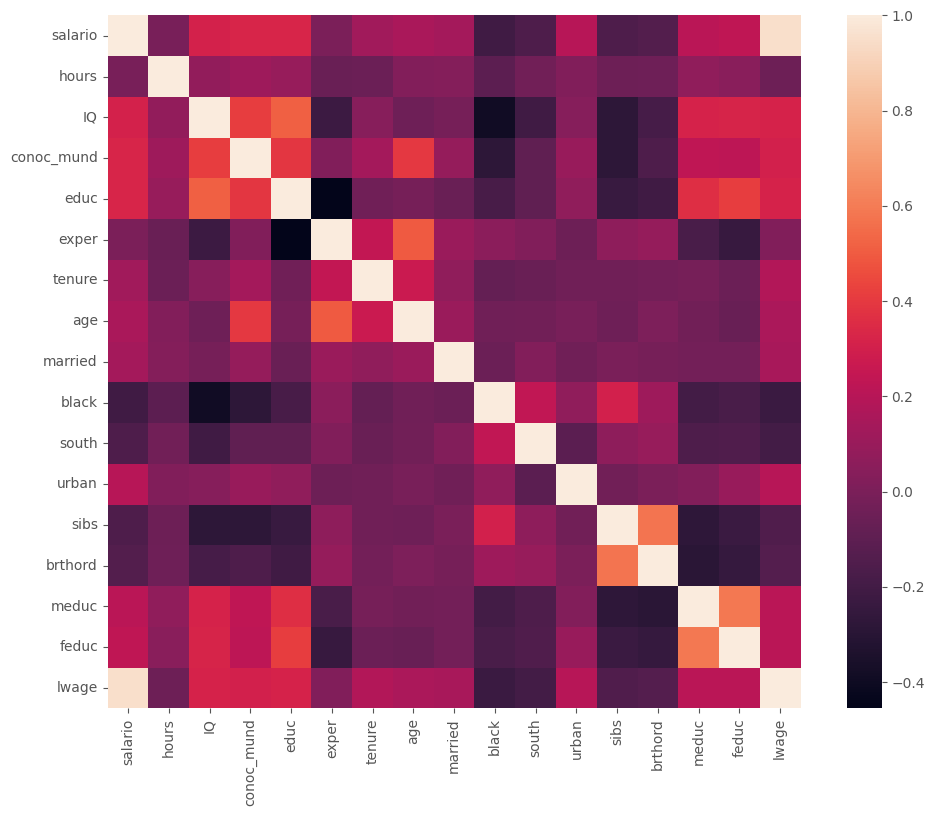

In [84]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 9))
sns.heatmap(
    corr_matrix,
    square    = True,
    ax        = ax
)

ax.tick_params(labelsize = 10)

In [85]:
# Quitando del análisis las variables dummy
# ==============================================================================
numeric_cols = df1.select_dtypes(include=np.number).columns
dummy_cols = [col for col in numeric_cols if df1[col].nunique() == 2 and all(x in [0,1] for x in df1[col].unique())]
numeric_cols = list(set(numeric_cols) - set(dummy_cols))
df1[numeric_cols].describe()

,salario,educ,lwage,hours,feduc,age,conoc_mund,meduc,brthord,IQ,sibs,tenure,exper
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,957.945455,13.468449,6.779004,43.929412,10.041217,33.080214,35.744385,10.641349,2.281728,101.282353,2.941176,7.234225,11.563636
std,404.360822,2.196654,0.421144,7.224256,3.073279,3.107803,7.638788,2.751471,1.536286,15.052636,2.306254,5.075206,4.374586
min,115.000000,9.000000,4.744932,20.000000,0.000000,28.000000,12.000000,0.000000,1.000000,50.000000,0.000000,0.000000,1.000000
25%,669.000000,12.000000,6.505783,40.000000,8.000000,30.000000,31.000000,9.000000,1.000000,92.000000,1.000000,3.000000,8.000000
50%,905.000000,12.000000,6.807935,40.000000,10.000000,33.000000,37.000000,11.800000,2.000000,102.000000,2.000000,7.000000,11.000000
75%,1160.000000,16.000000,7.056175,48.000000,12.000000,36.000000,41.000000,12.000000,3.000000,112.000000,4.000000,11.000000,15.000000
max,3078.000000,18.000000,8.032035,80.000000,18.000000,38.000000,56.000000,18.000000,10.000000,145.000000,14.000000,22.000000,23.000000


In [86]:
# DF sin las dummy
#===========================================================
df2 = df1.drop(columns=dummy_cols)
df2.head()

,salario,hours,IQ,conoc_mund,educ,exper,tenure,age,sibs,brthord,meduc,feduc,lwage
0,769,40,93,35,12,11,2,31,1,2.0,8.0,8.0,6.645091
1,808,50,119,41,18,11,16,37,1,2.0,14.0,14.0,6.694562
2,825,40,108,46,14,11,9,33,1,2.0,14.0,14.0,6.715384
3,650,40,96,32,12,13,7,32,4,3.0,12.0,12.0,6.476973
4,562,40,74,27,11,14,5,34,10,6.0,6.0,11.0,6.331502


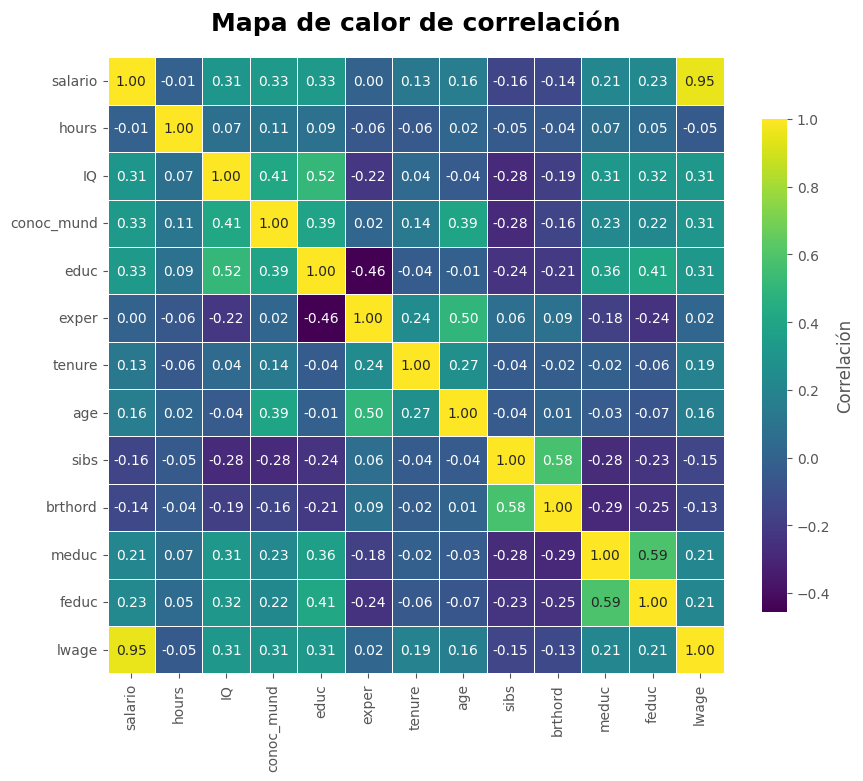

In [87]:
corr_matrix2 = df2.corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    corr_matrix2,
    square=True,
    annot=True,         # Mostrar valores de correlación
    fmt=".2f",          # Formato de las cifras
    cmap="viridis",    # Colores elegantes
    linewidths=0.5,     # Separación entre celdas
    cbar_kws={'shrink': 0.8, 'label': 'Correlación'}
)
ax.set_title("Mapa de calor de correlación", fontsize=18, fontweight="bold", pad=20)
plt.show()

In [88]:
# Exportando imágenes
# ==============================================================================
fig.savefig('fig1.png')
from google.colab import files
files.download("fig1.png")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## <font face="gotham" color="purple"> **1.4 Regresión típica**</font>

In [89]:
# División de los datos en train y test: performance del modelo
# ==============================================================================
X = df1.drop(columns=['lwage','salario'])
y = df1['lwage']
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [90]:
# Estandarización de datos con StandardScaler:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trainN = scaler.fit_transform(X_train) # Ajusta y transforma el conjunto de entrenamiento
X_testN= scaler.transform(X_test)       # Transforma el conjunto de prueba

In [91]:
# Estimación del modelo
# ==============================================================================
modelo1 = LinearRegression()
modelo1.fit(X_trainN, y_train)

LinearRegression()

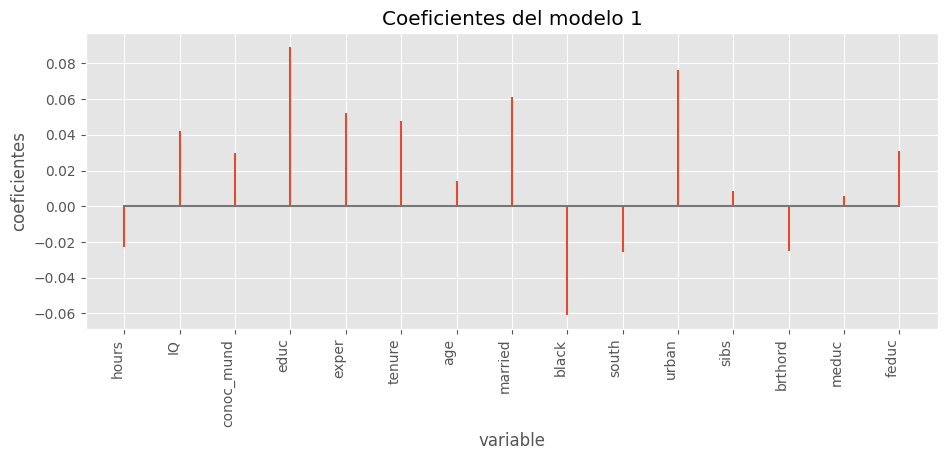

In [128]:
# Gráfico de coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X.columns,
                         'coef': modelo1.coef_.flatten()} )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo 1');

In [93]:
resultados = pd.DataFrame({'variable': X.columns, 'coef': modelo1.coef_[0]})
resultados

,variable,coef
0,hours,-0.023046
1,IQ,0.042105
2,conoc_mund,0.029896
3,educ,0.089417
4,exper,0.052325
5,tenure,0.047508
6,age,0.014153
7,married,0.061387
8,black,-0.061185
9,south,-0.025872


In [94]:
# Predicciones con el test
# ==============================================================================
predicciones = modelo1.predict(X=X_testN)
predicciones = predicciones.flatten()
predicciones[:10]

array([7.07805581, 6.7824153 , 7.08590856, 7.00879573, 6.96397602,
       6.58468886, 6.84952294, 6.94408378, 6.65999185, 7.00235881])

In [95]:
# Coeficiente de determinación
# ==============================================================================
print("R^2:", modelo1.score(X_testN, y_test))

R^2: 0.29470827914534115


In [96]:
# Error de la base test del modelo
# ==============================================================================
MSE = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones, )
print("")
print(f"El error (MSE) de test es: {MSE}")


El error (MSE) de test es: 0.12043316945025383


In [97]:
RMSE = np.sqrt(MSE)
print("")
print(f"El error (RMSE) de test es: {RMSE}")


El error (RMSE) de test es: 0.3470348245497184


Recordar que:
$$RMSE=\sqrt{\dfrac{1}{n}\sum_{i=1}^n(y_{true,i}-y_{pred,i})^2}$$

Asimismo, hay otras métricas (**funciones de pérdida**) como el $R^2$ y el MAE:
$$MAE = \frac{1}{n} \sum_{i=1}^{n} \left| y_{\text{true}, i} - y_{\text{pred}, i} \right|$$

# <font face="gotham" color="purple"> **2. Regresión Ridge**</font>

In [98]:
# Creación y entrenamiento del modelo (búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto RidgeCV utiliza el mean squared error
modelo2 = RidgeCV(
            alphas          = np.logspace(-10, 10, 200),
            fit_intercept   = True,
            store_cv_results = True
         )

_ = modelo2.fit(X = X_trainN, y = y_train)

**Nota**: cuando se utiliza regularización, es útil evaluar cómo se aproximan a cero los coeficientes a medida que se incrementa el valor de $\lambda$ así como la evolución del error de validación cruzada en función del $\lambda$ empleado.

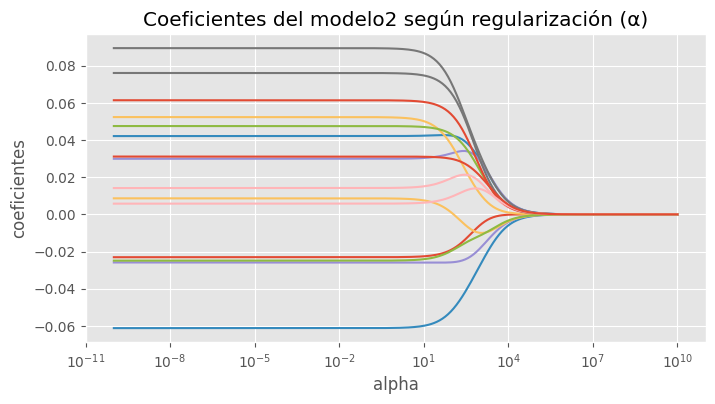

In [99]:
# Evolución de coeficientes en función de alpha
# ==============================================================================
alphas = modelo2.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Ridge(alpha=alpha, fit_intercept=False)
    modelo_temp.fit(X_trainN, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo2 según regularización (α)');
plt.axis('tight')
plt.show()

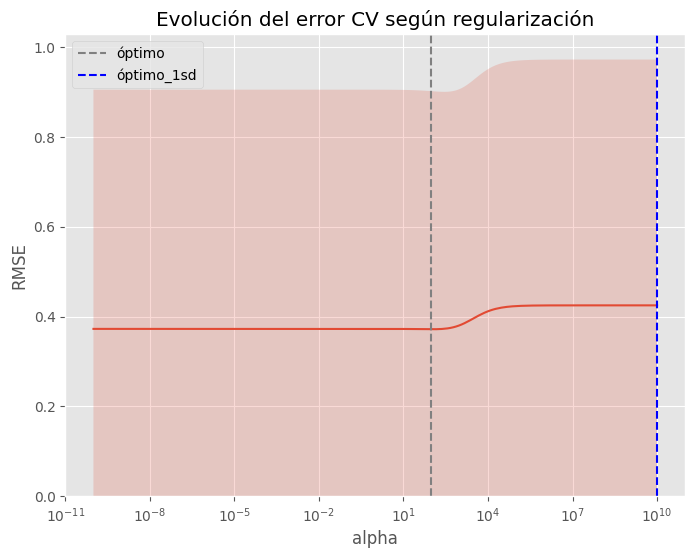

In [100]:
# Evolución del error en función de alpha
# ==============================================================================
mse_cv = modelo2.cv_results_.reshape((-1, 200)).mean(axis=0)
mse_sd = modelo2.cv_results_.reshape((-1, 200)).std(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo2.alphas[np.argmin(rmse_cv)]
optimo_1sd   = modelo2.alphas[rmse_cv == min_rsme_1sd]


# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(modelo2.alphas, rmse_cv)
ax.fill_between(
    modelo2.alphas,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)
ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV según regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

In [101]:
# Mejor valor alpha encontrado
# ==============================================================================
print(f"Mejor valor de alpha: {modelo2.alpha_}")

Mejor valor de alpha: 91.15888299750837


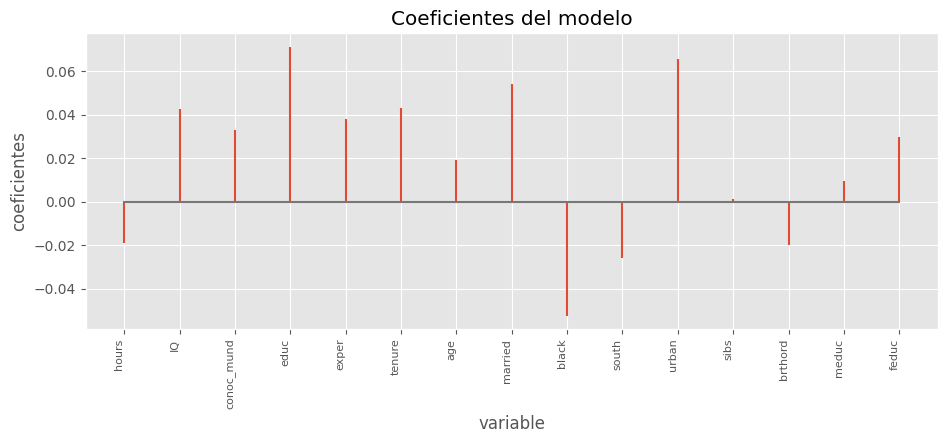

In [102]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X.columns,
                         'coef': modelo2.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=8)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [103]:
# Predicciones test
# ==============================================================================
predicciones = modelo2.predict(X=X_testN)
predicciones = predicciones.flatten()
predicciones[:10]

array([7.06468357, 6.78450684, 7.08659533, 6.98160486, 6.95416358,
       6.61826034, 6.8293341 , 6.92789706, 6.6340849 , 6.97862144])

In [104]:
# Error de test del modelo
# ==============================================================================
MSE_ridge = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones)
print("")
print(f"El error (MSE Ridge) de test es: {MSE_ridge}")


El error (MSE Ridge) de test es: 0.1213220536654648


In [105]:
RMSE_ridge = np.sqrt(MSE_ridge)
print("")
print(f"El error (RMSE Ridge) de test es: {RMSE_ridge}")


El error (RMSE Ridge) de test es: 0.348313154597217


# <font face="gotham" color="purple"> **3. Regresión LASSO**</font>

In [106]:
# Entrenamiento del modelo (búsqueda por CV del valor óptimo alpha)
# ==============================================================================
modelo3 = LassoCV(
            alphas          = np.logspace(-10, 10, 200),
            cv              = 10)
_ = modelo3.fit(X = X_trainN, y = y_train.ravel())

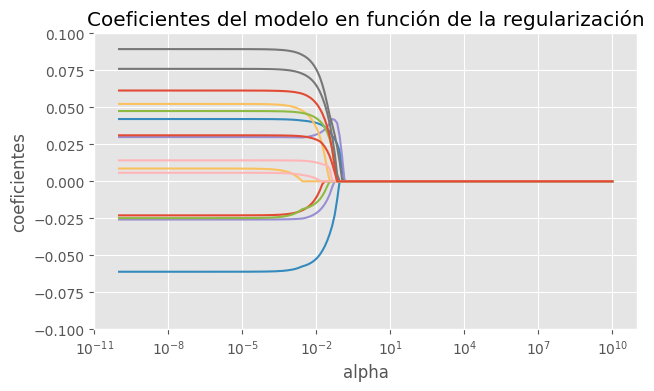

In [107]:
# Evolución de los coeficientes en función de alpha
# ==============================================================================
alphas = modelo3.alphas_
coefs = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False)
    modelo_temp.fit(X_trainN, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_ylim([-0.1,0.1]) # Ajustar
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');

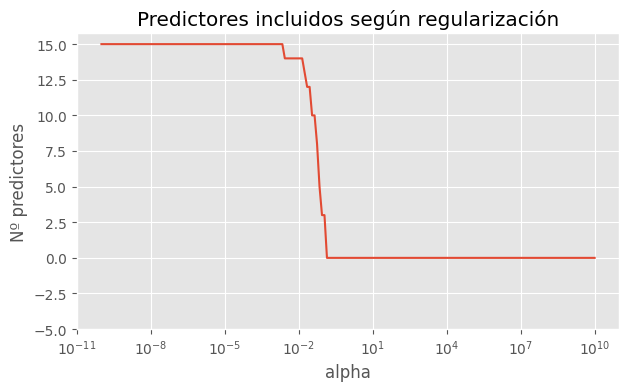

In [108]:
# Número de predictores incluidos (coeficiente !=0) en función de alpha
# ==============================================================================
alphas = modelo3.alphas_
n_predictores = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False)
    modelo_temp.fit(X_trainN, y_train)
    coef_no_cero = np.sum(modelo_temp.coef_.flatten() != 0)
    n_predictores.append(coef_no_cero)

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, n_predictores)
ax.set_xscale('log')
ax.set_ylim([-5,None])
ax.set_xlabel('alpha')
ax.set_ylabel('Nº predictores')
ax.set_title('Predictores incluidos según regularización');

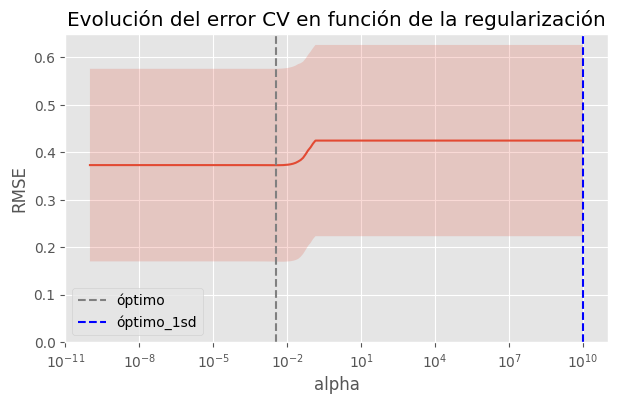

In [109]:
# Evolución del error en función de alpha
# ==============================================================================
mse_cv = modelo3.mse_path_.mean(axis=1)
mse_sd = modelo3.mse_path_.std(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo3.alphas_[np.argmin(rmse_cv)]
optimo_1sd   = modelo3.alphas_[rmse_cv == min_rsme_1sd][0] #Se elige el primer elemento

# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(modelo3.alphas_, rmse_cv)
ax.fill_between(modelo3.alphas_,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2)

ax.axvline(x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo')

ax.axvline(x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd')

ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

In [110]:
# Mejor alpha encontrado
# ==============================================================================
print(f"Mejor valor de alpha: {modelo3.alpha_}")

Mejor valor de alpha: 0.0034489622604057598


In [111]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X.columns,
                         'coef': modelo3.coef_.flatten()})

# Predictores incluidos en el modelo (coeficiente != 0)
df_coeficientes[df_coeficientes.coef != 0]

,predictor,coef
0,hours,-0.018742
1,IQ,0.040883
2,conoc_mund,0.029842
3,educ,0.084456
4,exper,0.046523
5,tenure,0.045847
6,age,0.013806
7,married,0.058546
8,black,-0.057023
9,south,-0.024833


**Nota**: puede visualizarse que la variable `sibs` no está presente. Verificamos:

In [112]:
relevantes = df_coeficientes[df_coeficientes.coef != 0]
irrelevantes= df_coeficientes[df_coeficientes.coef == 0]

print("Variables relevantes:")
print(relevantes)
print("\nVariables irrelevantes:")
print(irrelevantes)

Variables relevantes:
     predictor      coef
0        hours -0.018742
1           IQ  0.040883
2   conoc_mund  0.029842
3         educ  0.084456
4        exper  0.046523
5       tenure  0.045847
6          age  0.013806
7      married  0.058546
8        black -0.057023
9        south -0.024833
10       urban  0.071935
12     brthord -0.018396
13       meduc  0.004004
14       feduc  0.030179

Variables irrelevantes:
   predictor  coef
11      sibs   0.0


In [113]:
# Predicciones test
# ==============================================================================
predicciones = modelo3.predict(X=X_testN)
predicciones = predicciones.flatten()
predicciones[:10]

array([7.06186305, 6.78929808, 7.07922624, 7.00211416, 6.96502318,
       6.59723228, 6.83925389, 6.94024448, 6.6559784 , 6.99497582])

In [114]:
# Error de test del modelo
# ==============================================================================
MSE_lasso = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones)
print("")
print(f"El error (MSE LASSO) de test es: {MSE_lasso}")


El error (MSE LASSO) de test es: 0.12119725994825793


In [115]:
RMSE_lasso= np.sqrt(MSE_lasso)
print("")
print(f"El error (RMSE LASSO) de test es: {RMSE_lasso}")


El error (RMSE LASSO) de test es: 0.34813396839185046


# <font face="gotham" color="purple"> **4. Conclusiones**</font>

## <font face="gotham" color="purple"> **4.1 Comparación**</font>

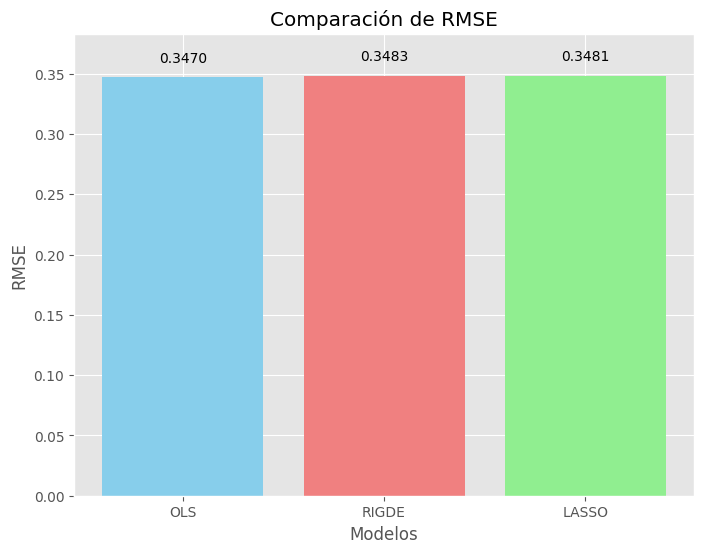

In [116]:
modelos = ['OLS', 'RIGDE', 'LASSO']
rmse_values = [RMSE, RMSE_ridge, RMSE_lasso]

plt.figure(figsize=(8, 6))
plt.bar(modelos, rmse_values, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Modelos")
plt.ylabel("RMSE")
plt.title("Comparación de RMSE")
plt.ylim(0, max(rmse_values) * 1.1)

for i, v in enumerate(rmse_values):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', va='bottom')
plt.show()

**CONCLUSIÓN: el mejor de todos es RIDGE**

## <font face="gotham" color="purple"> **4.2 Reflexiones**</font>



✅ El cambio en el tamaño del train puede generar resultados diferentes.

✅ Asintóticamente, OLS puede ser el mejor bajo no colinealidad.  Ridge también puede ser útil pero supeditado a colinealidad.

✅ LASSO permite quitar variables irrelevates.




# <font face="gotham" color="purple"> **5. Árboles de decisión**</font>

En general, se suelen utilizar para tareas de `regresión` y `clasificación`. A lo primero se denomina **árboles de regresión** y es muy útil cuando el target es contínuo y los datos no ofrecen relaciones lineales.

Algunos conceptos básicos aquí:
https://www.ibm.com/es-es/topics/decision-trees

## <font face="gotham" color="purple"> **5.1 Modelación**</font>

In [117]:
# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')

In [118]:
df1=woo.data('wage2')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   wage     935 non-null    int64  
 1   hours    935 non-null    int64  
 2   IQ       935 non-null    int64  
 3   KWW      935 non-null    int64  
 4   educ     935 non-null    int64  
 5   exper    935 non-null    int64  
 6   tenure   935 non-null    int64  
 7   age      935 non-null    int64  
 8   married  935 non-null    int64  
 9   black    935 non-null    int64  
 10  south    935 non-null    int64  
 11  urban    935 non-null    int64  
 12  sibs     935 non-null    int64  
 13  brthord  852 non-null    float64
 14  meduc    857 non-null    float64
 15  feduc    741 non-null    float64
 16  lwage    935 non-null    float64
dtypes: float64(4), int64(13)
memory usage: 124.3 KB


In [119]:
df1 = df1.drop(columns='lwage')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   wage     935 non-null    int64  
 1   hours    935 non-null    int64  
 2   IQ       935 non-null    int64  
 3   KWW      935 non-null    int64  
 4   educ     935 non-null    int64  
 5   exper    935 non-null    int64  
 6   tenure   935 non-null    int64  
 7   age      935 non-null    int64  
 8   married  935 non-null    int64  
 9   black    935 non-null    int64  
 10  south    935 non-null    int64  
 11  urban    935 non-null    int64  
 12  sibs     935 non-null    int64  
 13  brthord  852 non-null    float64
 14  meduc    857 non-null    float64
 15  feduc    741 non-null    float64
dtypes: float64(3), int64(13)
memory usage: 117.0 KB


In [120]:
# División de los datos en entrenamiento y prueba
# ------------------------------------------------------------------------------
X_trainA, X_testA, y_trainA, y_testA = train_test_split(
                                        df1.drop(columns ="wage"),
                                        df1['wage'],
                                        random_state = 123
                                    )
# Creación del modelo
# ------------------------------------------------------------------------------
modelito = DecisionTreeRegressor(
            max_depth         = 3, #profundidad
            random_state      = 123
          )

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
modelito.fit(X_trainA, y_trainA)

DecisionTreeRegressor(max_depth=3, random_state=123)

Profundidad del árbol: 3
Número de nodos terminales: 8


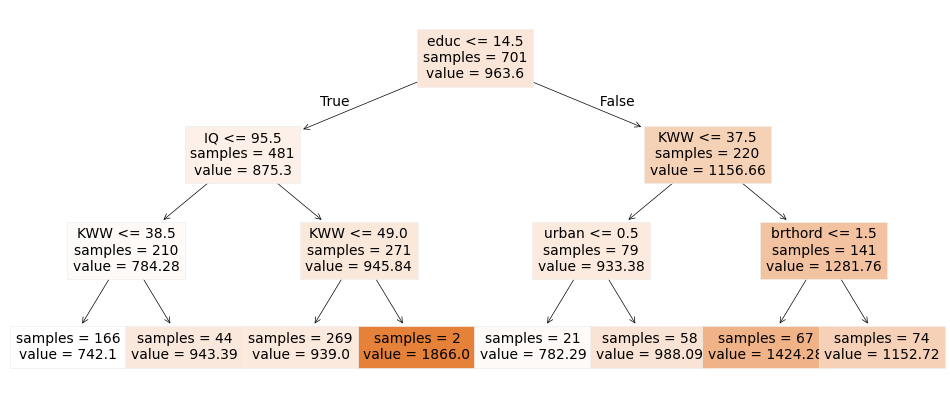

In [121]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {modelito.get_depth()}")
print(f"Número de nodos terminales: {modelito.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelito,
            feature_names = df1.drop(columns = "wage").columns,
            class_names   = ['wage'],
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [122]:
texto_modelito = export_text(
                    decision_tree = modelito,
                    feature_names = list(df1.drop(columns = "wage").columns)
               )
print(texto_modelito)

|--- educ <= 14.50
|   |--- IQ <= 95.50
|   |   |--- KWW <= 38.50
|   |   |   |--- value: [742.10]
|   |   |--- KWW >  38.50
|   |   |   |--- value: [943.39]
|   |--- IQ >  95.50
|   |   |--- KWW <= 49.00
|   |   |   |--- value: [939.00]
|   |   |--- KWW >  49.00
|   |   |   |--- value: [1866.00]
|--- educ >  14.50
|   |--- KWW <= 37.50
|   |   |--- urban <= 0.50
|   |   |   |--- value: [782.29]
|   |   |--- urban >  0.50
|   |   |   |--- value: [988.09]
|   |--- KWW >  37.50
|   |   |--- brthord <= 1.50
|   |   |   |--- value: [1424.28]
|   |   |--- brthord >  1.50
|   |   |   |--- value: [1152.72]



**Predictores importantes:**

In [123]:
importancia = pd.DataFrame(
                            {'predictor': df1.drop(columns = "wage").columns,
                             'importancia': modelito.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
3,educ,0.433833
2,KWW,0.336189
1,IQ,0.112125
12,brthord,0.094147
10,urban,0.023707
0,hours,0.000000
4,exper,0.000000
6,age,0.000000
5,tenure,0.000000
8,black,0.000000


## <font face="gotham" color="purple"> **4.1 Podado del árbol (pruning)**</font>

<frozen importlib._bootstrap>:1047: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()


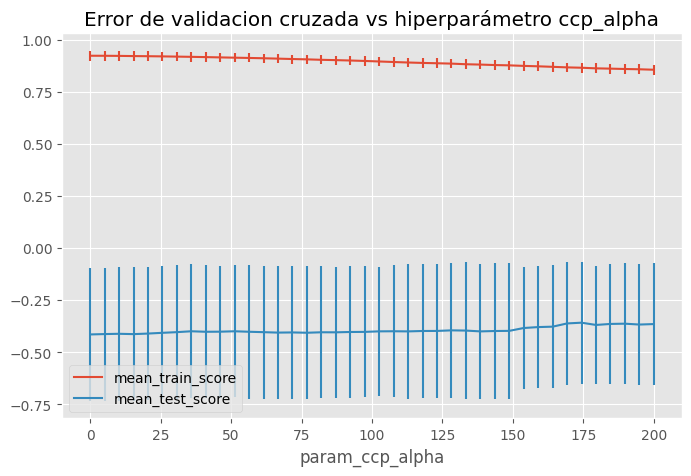

In [124]:
# Pruning por validación cruzada
# ------------------------------------------------------------------------------
# Optimización de valores del hiperparámetro de poda "ccp_alpha"
param_grid = {'ccp_alpha':np.linspace(0, 200, 40)}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible para luego aplicar el pruning
        estimator = DecisionTreeRegressor(
                            max_depth         = None,
                            min_samples_split = 4,
                            min_samples_leaf  = 1,
                            random_state      = 123
                       ),
        param_grid = param_grid,
        cv         = 10,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_trainA, y_trainA)

fig, ax = plt.subplots(figsize=(8, 5))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");

In [125]:
# Mejor valor ccp_alpha encontrado
# ------------------------------------------------------------------------------
grid.best_params_

{'ccp_alpha': np.float64(174.35897435897436)}

**¿El problema?** overfitting.

In [129]:
# Error de test del modelo inicial
#-------------------------------------------------------------------------------
predicciones = modelito.predict(X = X_testA)

mse = mean_squared_error(
        y_true  = y_testA,
        y_pred  = predicciones,
       )
print(f"El error (MSE) de test es: {mse}")

El error (MSE) de test es: 120043.55872922804


**Nota:**
Algunos códigos han sido estraídos de https://cienciadedatos.net/.

`¿Esto es todo?` NO, sólo es el primer paso.

Ejemplos:


✅ **Kernel Ridge:**
combina la regresión RIDGE con el kernel trick para ajustar relaciones no lineales entre características.

✅ **Gaussian Process Regressor:** utiliza un enfoque probabilístico para modelar la relación entre las características y el target; cada predicción se modela como una distribución gaussiana.